# Visualise Henon-Heiles using forward Euler, Symplectic Euler, Verlet and RK4 integrators

In [ ]:
import sys
sys.path.append('..')

import numpy as np
import math
from matplotlib import pyplot as plt
from Code.time_integrator import *
from Code.dynamical_system import *

##Define parameters for the Henon-Heiles chaotic system

In [ ]:
np.random.seed(2512517)
mass = 1
dt = 0.005
T_final = 400.0
HenonHeiles = HenonHeiles(mass)
forward_euler_integrator = ForwardEulerIntegrator(HenonHeiles,dt)
verlet_integrator = VerletIntegrator(HenonHeiles,dt)
symplectic_euler_integrator = SymplecticEulerIntegrator(HenonHeiles,dt)
rk4_integrator = RK4Integrator(HenonHeiles,dt)
x = np.zeros((1,2))
v = np.zeros((1,2))
x[0] = [-0.1,-0.2]
v[0] = [-0.2,-0.05]

##Integrate using the given numerical methods

In [ ]:
n_step = int(T_final/dt)
energies = np.zeros((4,n_step))
x_phase = np.zeros((4,n_step,2))
v_phase = np.zeros((4,n_step,2))

for j, integrator in enumerate((forward_euler_integrator,verlet_integrator,symplectic_euler_integrator,rk4_integrator)):
    integrator.set_state(x,v)
    for k in range(n_step):
        energies[j,k] = HenonHeiles.energy(integrator.x,integrator.v)
        x_phase[j,k,0] = integrator.x[0]
        x_phase[j,k,1] = integrator.x[1]
        v_phase[j,k,0] = integrator.v[0]
        v_phase[j,k,1] = integrator.v[1]
        integrator.integrate(1)    

/content/drive/MyDrive/em459-neuralnetworkintegrators-4558d770a7c6/dynamical_system.py:638: RuntimeWarning: overflow encountered in double_scalars
  V = 0.5*(x[0]**2 + x[1]**2 + 2*(x[0]**2)*x[1] - (2/3)*x[1]**3)
/content/drive/MyDrive/em459-neuralnetworkintegrators-4558d770a7c6/dynamical_system.py:638: RuntimeWarning: invalid value encountered in double_scalars
  V = 0.5*(x[0]**2 + x[1]**2 + 2*(x[0]**2)*x[1] - (2/3)*x[1]**3)
/content/drive/MyDrive/em459-neuralnetworkintegrators-4558d770a7c6/dynamical_system.py:640: RuntimeWarning: overflow encountered in double_scalars
  K = 0.5*((mass*v[0])**2 + (mass*v[1])**2)
/content/drive/MyDrive/em459-neuralnetworkintegrators-4558d770a7c6/dynamical_system.py:617: RuntimeWarning: overflow encountered in double_scalars
  force[0] = -(x[0] + 2*x[0]*x[1])/self.mass
/content/drive/MyDrive/em459-neuralnetworkintegrators-4558d770a7c6/dynamical_system.py:618: RuntimeWarning: overflow encountered in double_scalars
  force[1] = -(x[1] + x[0]**2 - x[1]**2)/

## Plot phase space diagram of the first mass / bob

Text(0.5, 0, 'x-position $x$')

<Figure size 1440x576 with 0 Axes>

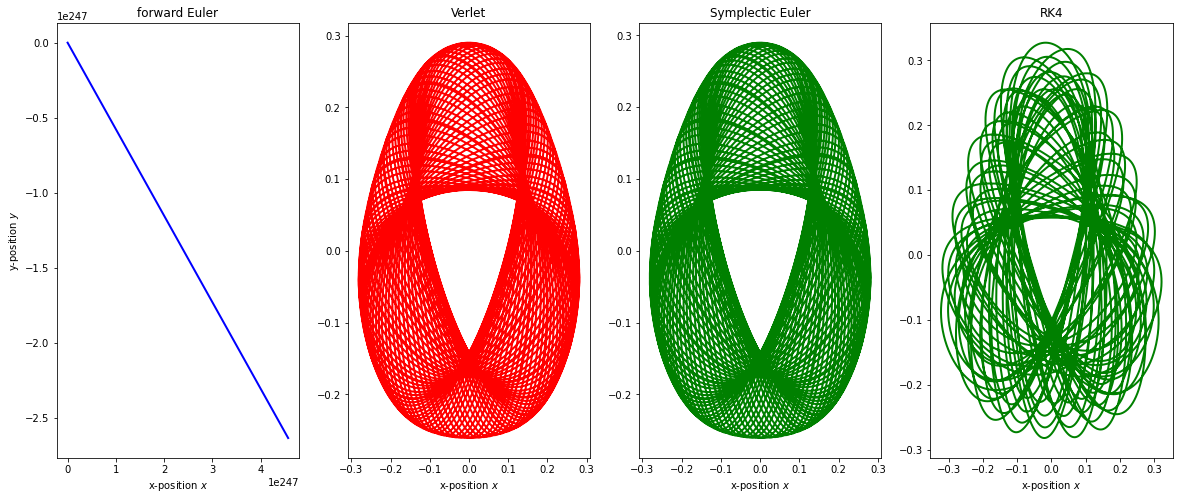

In [ ]:
plt.clf()
figs, axs = plt.subplots(1,4)
X = dt*np.arange(n_step)
axs[0].plot(x_phase[0,:,0],x_phase[0,:,1],linewidth=2,color='blue')
axs[0].set_title('forward Euler')
axs[0].set_xlabel('x-position $x$')
axs[0].set_ylabel('y-position $y$')
axs[1].plot(x_phase[1,:,0],x_phase[1,:,1],linewidth=2,color='red')
axs[1].set_title('Verlet')
axs[1].set_xlabel('x-position $x$')
axs[2].plot(x_phase[2,:,0],x_phase[2,:,1],linewidth=2,color='green')
axs[2].set_title('Symplectic Euler')
axs[2].set_xlabel('x-position $x$')
axs[3].plot(x_phase[3,:,0],x_phase[3,:,1],linewidth=2,color='green')
axs[3].set_title('RK4')
axs[3].set_xlabel('x-position $x$')

## Plot energy drift 

<Figure size 432x288 with 0 Axes>

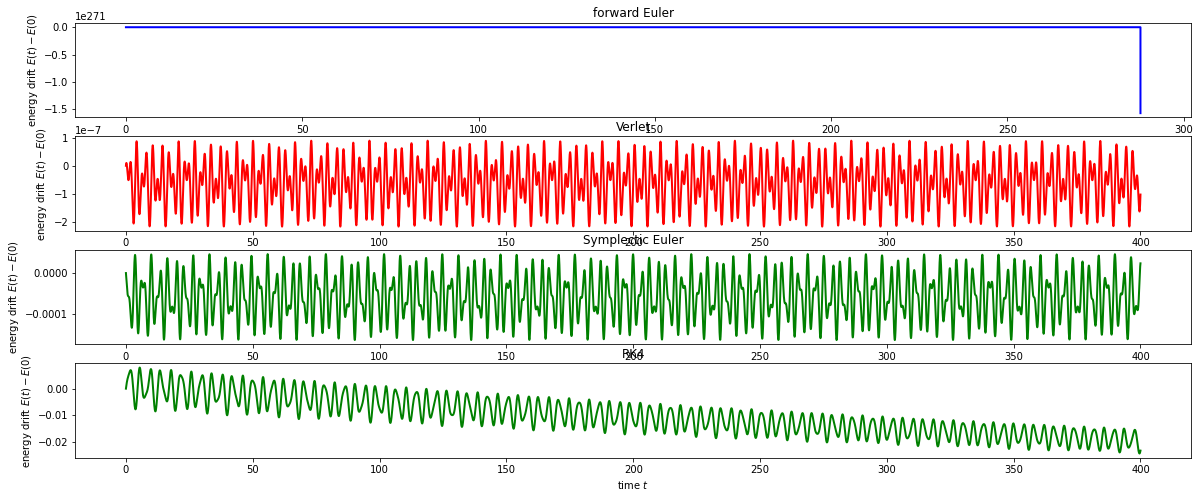

In [ ]:
plt.clf()

plt.rcParams['figure.figsize'] = [20, 8]
figs, axs = plt.subplots(4,1)
X = dt*np.arange(n_step)
axs[0].plot(X,energies[0,:]-energies[0,0],linewidth=2,color='blue')
axs[0].set_ylabel('energy drift $E(t)-E(0)$')
axs[0].set_title('forward Euler')
axs[1].plot(X,energies[1,:]-energies[1,0],linewidth=2,color='red')
axs[1].set_title('Verlet')
axs[1].set_xlabel('time $t$')
axs[1].set_ylabel('energy drift $E(t)-E(0)$')
axs[2].plot(X,energies[2,:]-energies[2,0],linewidth=2,color='green')
axs[2].set_title('Symplectic Euler')
axs[2].set_xlabel('time $t$')
axs[2].set_ylabel('energy drift $E(t)-E(0)$')
axs[3].plot(X,energies[3,:]-energies[3,0],linewidth=2,color='green')
axs[3].set_title('RK4')
axs[3].set_xlabel('time $t$')
axs[3].set_ylabel('energy drift $E(t)-E(0)$')
plt.savefig('energies.pdf',bbox_inches='tight')